In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import PIL
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [ ]:
image_size = (224, 224)
batch_size = 50
#transform = ImageDataGenerator(preprocessing_function= keras.applications.resnet.preprocess_input, validation_split=0.2)

In [ ]:
image_gen = ImageDataGenerator(preprocessing_function= keras.applications.resnet.preprocess_input, validation_split=0.2 )    

train_dataset = image_gen.flow_from_directory(batch_size=batch_size,
                                                 directory="/content/drive/MyDrive/standford_dt/car_train/car_train",
                                                 #shuffle=True,
                                                 target_size=image_size, 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_gen.flow_from_directory(batch_size=batch_size,
                                                 directory="/content/drive/MyDrive/standford_dt/car_train/car_train",
                                                 #shuffle=True,
                                                 target_size=image_size, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 10413 images belonging to 157 classes.
Found 2535 images belonging to 157 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=True, input_tensor=inputs)

102981632/102967424 [==============================] - 1s 0us/step


In [ ]:
last_layer = base_model.layers[-2].output 
out = Dense(units = 157, activation = 'softmax', name = 'ouput')(last_layer)
head_model = Model(inputs = inputs, outputs = out)

In [ ]:
for layer in head_model.layers[:-25]:
  layer.trainable = False

In [ ]:
head_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
head_model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode = 'min')

In [ ]:
#head_model1 = head_model.fit_generator(generator = train_ds, epochs=10,  validation_data = val_ds,callbacks=[callback])
head_model1 = head_model.fit_generator(generator = train_dataset, validation_data = validation_dataset,epochs = 25 , callbacks=[callback] , verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
209/209 [==============================] - 2741s 13s/step - loss: 0.3651 - accuracy: 0.8998 - val_loss: 1.5192 - val_accuracy: 0.6032
Epoch 2/25
209/209 [==============================] - 2718s 13s/step - loss: 0.1925 - accuracy: 0.9513 - val_loss: 1.4107 - val_accuracy: 0.6355


In [ ]:
head_model.save('/content/drive/MyDrive/standford_dt/resnet50')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/standford_dt/resnet50/assets


In [ ]:
transform_test = ImageDataGenerator(preprocessing_function= keras.applications.resnet.preprocess_input)
test_ds = transform_test.flow_from_directory(
    "/content/drive/MyDrive/standford_dt/car_test/cars_test",
    seed = 42,target_size=image_size,batch_size=batch_size
)

Found 3237 images belonging to 157 classes.


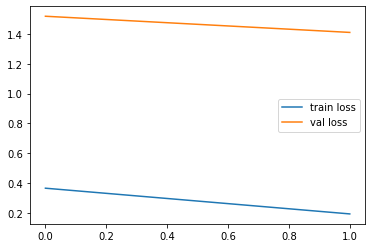

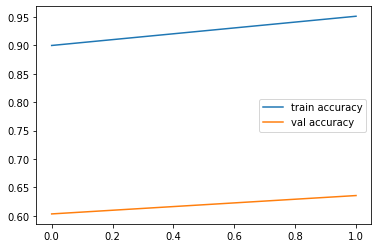

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(head_model1.history['loss'], label='train loss')
plt.plot(head_model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies for r
plt.plot(head_model1.history['accuracy'], label='train accuracy')
plt.plot(head_model1.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
plt.plot(head_model1.history['loss'], label='train loss')
plt.plot(head_model1.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies for r
plt.plot(head_model1.history['accuracy'], label='train accuracy')
plt.plot(head_model1.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.8.2


In [ ]:
#Save model
import tensorflow as tf
from keras.models import Model

from keras.models import load_model



In [ ]:
head_model.save('/content/drive/MyDrive/standford_dt/resnet50')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/standford_dt/resnet50/assets
